In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
from sklearn.linear_model import LogisticRegression 
loreg=LogisticRegression()
from sklearn.linear_model import LinearRegression
model= LinearRegression()
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
import statsmodels

In [2]:
df = pd.read_csv("files folder\\titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.drop(["boat","home.dest","body","cabin"],axis=1,inplace=True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   float64
 6   parch     1309 non-null   float64
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(6), object(4)
memory usage: 102.5+ KB


In [5]:
df.nunique()

pclass         3
survived       2
name        1307
sex            2
age           98
sibsp          7
parch          8
ticket       929
fare         281
embarked       3
dtype: int64

In [6]:
df.isnull().sum()

pclass        1
survived      1
name          1
sex           1
age         264
sibsp         1
parch         1
ticket        1
fare          2
embarked      3
dtype: int64

In [7]:
df["ticket"].mode()

0    CA. 2343
dtype: object

In [8]:
df.sex = df.sex.map({'male':0, 'female':1})
df["age"].fillna(df["age"].median(),inplace=True)
df['embarked']=df["embarked"].fillna('S')
df.survived.fillna(0,inplace=True)
df.sex.fillna(1,inplace=True)
df.pclass.fillna((df["pclass"].median()),inplace=True)
df.fare.fillna((df["fare"].mean()),inplace=True)
df.parch.fillna((df["parch"].median()),inplace=True)
df.sibsp.fillna((df["sibsp"].median()),inplace=True)
df.ticket.fillna(('CA. 2343'),inplace=True)
df.isnull().sum()

pclass      0
survived    0
name        1
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [9]:
df.dropna(axis=0,how='any',inplace=True)
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [10]:
df.embarked = df.embarked.map({'S':0, 'C':0.5,'Q':1})
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1.0,29.0000,0.0,0.0,24160,211.3375,0.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.0,0.9167,1.0,2.0,113781,151.5500,0.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",1.0,2.0000,1.0,2.0,113781,151.5500,0.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0.0,30.0000,1.0,2.0,113781,151.5500,0.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1.0,25.0000,1.0,2.0,113781,151.5500,0.0
...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",1.0,14.5000,1.0,0.0,2665,14.4542,0.5
1305,3.0,0.0,"Zabour, Miss. Thamine",1.0,28.0000,1.0,0.0,2665,14.4542,0.5
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",0.0,26.5000,0.0,0.0,2656,7.2250,0.5
1307,3.0,0.0,"Zakarian, Mr. Ortin",0.0,27.0000,0.0,0.0,2670,7.2250,0.5


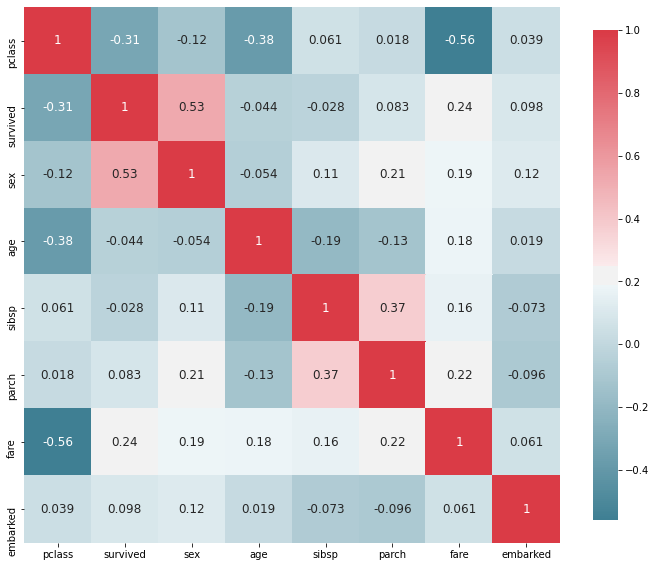

In [11]:
corr = df.corr()
s , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
s = sns.heatmap(
    corr, 
    cmap = cmap,
    square=True, 
    cbar_kws={ 'shrink' : .9 },
    ax=ax, 
    annot = True,
    annot_kws = { 'fontsize' : 12 })

In [21]:
x=df[["sex"]]
y=df[["survived"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
loreg.fit(x_train,y_train)
y_pred=loreg.predict(x_test)
loreg.score(x_test,y_test)

c:\users\user16\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7595419847328244

[[129  25]
 [ 38  70]]


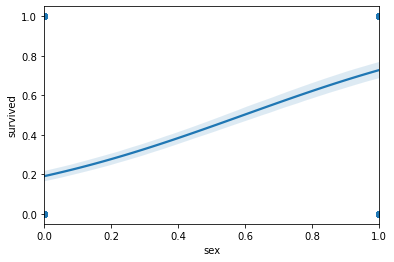

In [22]:
a=confusion_matrix(y_test, y_pred)
print(a)
sns.regplot(x="sex",y="survived",data=df,logistic=True)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       154
         1.0       0.74      0.65      0.69       108

    accuracy                           0.76       262
   macro avg       0.75      0.74      0.75       262
weighted avg       0.76      0.76      0.76       262



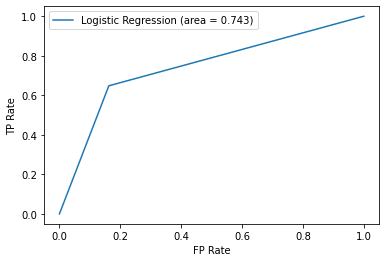

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
a = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, loreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % a)
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.legend(loc="upper left")
plt.show()

We can use the ROC (receiver operating characteristic) graph to focus on our success rate within the positives. Indeed it plots the true positives rate against the false positives rate.
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
The AUC (area under the curve) is representative of the concordance a statistic value showing the accuracy of the predictions of our model with 1.000 being a perfect guess and 0.500 the standard probability.